In [1]:
import ampal
import isambard
import isambard.specifications as specs
import isambard.modelling as modelling
import isambard.optimisation.evo_optimizers as ev_opts
from isambard.optimisation.evo_optimizers import Parameter
import budeff

import matplotlib.pyplot as plt
import numpy as np
import itertools
from pprint import pprint
import nglview as nv
from contextlib import redirect_stdout

%matplotlib inline

In [2]:
def show_ball_and_stick(ampal):
    view = nv.show_text(ampal.pdb)
    view.add_ball_and_stick()
    view.remove_cartoon()
    return view

In [3]:
REGISTER_ADJUST = {
    'a': 0,
    'b': 102.8,
    'c': 205.6,
    'd': 308.4,
    'e': 51.4,
    'f': 154.2,
    'g': 257
}

In [4]:
specification = specs.CoiledCoil.from_parameters

In [5]:
sequences = ['GQLEQELAALDQEIAAAEQELAALDWQIQG', 'GQIQWDLAALEQEAAAIEQDLAALEQELQG']

In [6]:
parameters = [
    Parameter.static('Oligomeric State', 2),
    Parameter.static('Helix Length', 30),
    Parameter.dynamic('Radius', 5.0, 1.0),
    Parameter.dynamic('Pitch', 200, 60),
    Parameter.dynamic('PhiCA', REGISTER_ADJUST['c'], 27),  
]

In [7]:
default_values = [x.default_value for x in parameters]
print(default_values)

[2, 30, 5.0, 200, 205.6]


In [8]:
def get_bude_total_energy(ampal_object):
    return budeff.get_internal_energy(ampal_object).total_energy

### Genetic Algorithm

In [9]:
opt_ga = ev_opts.GA(specification, sequences, parameters, get_bude_total_energy)

In [10]:
opt_ga.run_opt(100, 30, cores=8)

gen	evals	avg     	std    	min     	max     
0  	68   	-819.356	45.3343	-895.398	-759.106
1  	82   	-868.532	27.8227	-907.198	-811.408
2  	66   	-890.518	5.61324	-907.198	-877.042
3  	72   	-894.859	4.7311 	-907.849	-888.906
4  	80   	-898.924	4.41564	-908.573	-892.564
5  	52   	-901.393	4.38154	-909.251	-894.522
6  	73   	-905.644	2.932  	-909.289	-899.341
7  	78   	-908.356	0.839949	-909.392	-906.198
8  	77   	-909.142	0.176586	-909.394	-908.67 
9  	91   	-909.28 	0.0742375	-909.508	-909.146
10 	67   	-909.33 	0.0527197	-909.508	-909.249
11 	65   	-909.36 	0.0467944	-909.516	-909.296
12 	78   	-909.384	0.0420565	-909.516	-909.325
13 	67   	-909.399	0.0421341	-909.516	-909.345
14 	66   	-909.409	0.0416727	-909.516	-909.356
15 	80   	-909.421	0.0363704	-909.516	-909.378
16 	69   	-909.431	0.0399938	-909.516	-909.383
17 	63   	-909.439	0.0392064	-909.516	-909.39 
18 	85   	-909.445	0.0427453	-909.516	-909.393
19 	84   	-909.474	0.0393202	-909.516	-909.404
20 	65   	-909.498	0.054794 	-9

In [11]:
optimized_model_ga = opt_ga.best_model

In [12]:
budeff.get_internal_energy(optimized_model_ga).total_energy

-909.9539350145228

In [13]:
funnel_data_ga = opt_ga.make_energy_funnel_data()

In [14]:
xs = [x[0] for x in funnel_data_ga]
ys = [x[1] for x in funnel_data_ga]
zs = [x[2] for x in funnel_data_ga]

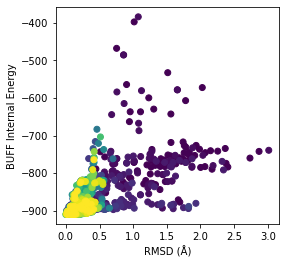

In [15]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(4, 4)
#ax.grid()
ax.scatter(xs, ys, c=zs)
ax.set_xlabel('RMSD (Å)')
ax.set_ylabel('BUFF Internal Energy')

fig.savefig('ga.png')

In [16]:
f = open('apCC-Di-AA-optimized-model-ga.pdb', 'w')

with redirect_stdout(f):
    print(optimized_model_ga.pdb)

### Differential Evolution

In [17]:
opt_de = ev_opts.DE(specification, sequences, parameters, get_bude_total_energy)

/home/eva/anaconda3/lib/python3.9/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/home/eva/anaconda3/lib/python3.9/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


In [18]:
opt_de.run_opt(100, 30, cores=8)

gen	evals	avg     	std    	min     	max     
0  	100  	-795.508	46.3177	-896.588	-686.424
1  	100  	-818.173	42.7206	-896.588	-694.805
2  	100  	-837.456	37.9662	-896.588	-757.863
3  	100  	-853.579	33.9155	-897.983	-767.347
4  	100  	-868.82 	28.0643	-899.413	-779.066
5  	100  	-881.464	18.9637	-899.413	-804.518
6  	100  	-890.253	8.22884	-901.822	-849.334
7  	100  	-893.129	4.32553	-901.822	-876.804
8  	100  	-894.959	3.2348 	-907.159	-888.021
9  	100  	-896.318	3.13636	-907.159	-890.311
10 	100  	-897.557	3.34859	-909.783	-892.553
11 	100  	-898.631	3.31662	-909.783	-892.853
12 	100  	-899.544	3.54565	-909.783	-893.952
13 	100  	-900.508	3.73876	-909.783	-894.592
14 	100  	-901.649	3.76973	-909.783	-895.443
15 	100  	-902.845	3.79725	-909.783	-896.237
16 	100  	-903.571	3.47867	-909.783	-896.906
17 	100  	-904.381	3.26939	-909.783	-897.523
18 	100  	-905.408	2.85042	-909.783	-899.512
19 	100  	-906.746	2.09576	-909.783	-899.512
20 	100  	-907.725	1.21258	-909.783	-901.214
21 	100  	

In [19]:
optimized_model_de = opt_de.best_model
budeff.get_internal_energy(optimized_model_de).total_energy

-909.8279586601816

In [20]:
funnel_data_de = opt_de.make_energy_funnel_data()

In [21]:
xs = [x[0] for x in funnel_data_de]
ys = [x[1] for x in funnel_data_de]
zs = [x[2] for x in funnel_data_de]

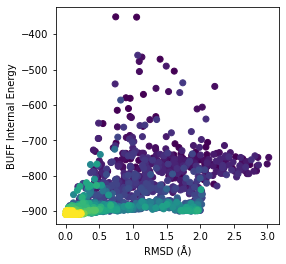

In [22]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(4, 4)
#ax.grid()
ax.scatter(xs, ys, c=zs)
ax.set_xlabel('RMSD (Å)')
ax.set_ylabel('BUFF Internal Energy')

fig.savefig('de.png')

In [23]:
f = open('apCC-Di-AA-optimized-model-de.pdb', 'w')

with redirect_stdout(f):
    print(optimized_model_de.pdb)

### Particle Swarm Optimisation

In [24]:
opt_pso = ev_opts.PSO(specification, sequences, parameters, get_bude_total_energy)

/home/eva/anaconda3/lib/python3.9/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


In [25]:
opt_pso.run_opt(100, 30, cores=8)

gen	evals	avg     	std    	min     	max     
0  	100  	-779.193	104.148	-898.578	-259.179
1  	62   	-801.264	128.129	-905.418	-130.071
2  	40   	-799.833	129.805	-905.418	-130.071
3  	25   	-803.062	120.853	-908.28 	-130.071
4  	73   	-778.716	100.664	-908.28 	-130.071
5  	91   	-783.165	46.6201	-905.418	-664.585
6  	88   	-802.967	128.391	-902.041	161.534 
7  	66   	-758.971	167.196	-903.259	161.534 
8  	42   	-754.737	155.321	-903.259	161.534 
9  	78   	-792.392	63.5392	-901.016	-489.495
10 	91   	-813.064	61.9206	-907.882	-489.495
11 	68   	-814.045	102.793	-907.882	-112.421
12 	18   	-807.595	108.381	-907.882	-112.421
13 	15   	-806.105	114.216	-907.882	-112.421
14 	54   	-805.404	118.131	-907.882	-112.421
15 	69   	-826.101	85.0456	-907.882	-421.733
16 	45   	-834.075	71.1559	-907.882	-421.733
17 	31   	-824.593	84.4433	-907.882	-421.733
18 	38   	-822.53 	87.8485	-907.882	-421.733
19 	46   	-822.447	84.9035	-907.882	-476.925
20 	47   	-827.608	95.3629	-907.882	-239.769
21 	38   	

In [26]:
optimized_model_pso = opt_pso.best_model
budeff.get_internal_energy(optimized_model_pso).total_energy

-908.2799054786825

In [27]:
funnel_data_pso = opt_pso.make_energy_funnel_data()

In [28]:
xs = [x[0] for x in funnel_data_pso]
ys = [x[1] for x in funnel_data_pso]
zs = [x[2] for x in funnel_data_pso]

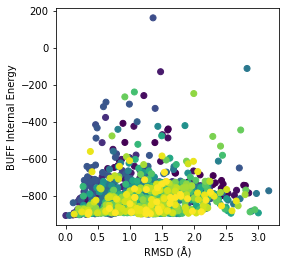

In [29]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(4, 4)
#ax.grid()
ax.scatter(xs, ys, c=zs)
ax.set_xlabel('RMSD (Å)')
ax.set_ylabel('BUFF Internal Energy')

fig.savefig('pso.png')

In [30]:
f = open('apCC-Di-AA-optimized-model-pso.pdb', 'w')

with redirect_stdout(f):
    print(optimized_model_pso.pdb)

### Covariance Matrix Adaptive Evolutionary Strategy

In [31]:
opt_cmaes = ev_opts.CMAES(specification, sequences, parameters, get_bude_total_energy)

/home/eva/anaconda3/lib/python3.9/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/home/eva/anaconda3/lib/python3.9/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


In [32]:
opt_cmaes.run_opt(100, 30, cores=8)

gen	evals	avg     	std    	min     	max     
0  	100  	-778.144	45.5552	-871.262	-666.731
1  	100  	-805.46 	44.7615	-889.639	-648.15 
2  	100  	-835.347	49.4234	-899.009	-704.934
3  	100  	-862.265	35.8223	-897.688	-736.367
4  	100  	-886.739	11.3808	-907.308	-833.102
5  	100  	-890.867	4.28079	-904.801	-878.607
6  	100  	-889.281	9.79066	-908.87 	-837.889
7  	100  	-887.667	12.3556	-901.954	-829.996
8  	100  	-888.871	12.5932	-905.574	-830.521
9  	100  	-885.248	17.9284	-908.981	-817.189
10 	100  	-889.195	9.69965	-906.931	-827.701
11 	100  	-886.892	13.613 	-905.016	-832.468
12 	100  	-885.577	15.7911	-905.033	-825.327
13 	100  	-887.316	16.307 	-907.555	-822.31 
14 	100  	-886.782	14.0565	-907.007	-835.332
15 	100  	-887.096	16.4339	-909.573	-833.679
16 	100  	-885.049	19.7592	-908.596	-832.829
17 	100  	-887.959	16.7761	-907.308	-833.812
18 	100  	-895.508	8.07334	-908.991	-877.244
19 	100  	-902.756	4.69222	-909.604	-887.474
20 	100  	-904.292	4.5967 	-909.575	-888.701
21 	100  	

In [33]:
optimized_model_cmaes = opt_cmaes.best_model
budeff.get_internal_energy(optimized_model_cmaes).total_energy

-909.6305080239321

In [34]:
funnel_data_cmaes = opt_cmaes.make_energy_funnel_data()

In [35]:
xs = [x[0] for x in funnel_data_cmaes]
ys = [x[1] for x in funnel_data_cmaes]
zs = [x[2] for x in funnel_data_cmaes]

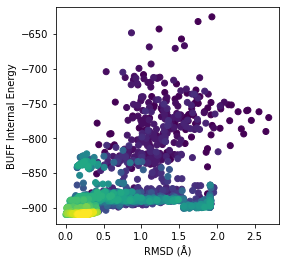

In [36]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(4, 4)
#ax.grid()
ax.scatter(xs, ys, c=zs)
ax.set_xlabel('RMSD (Å)')
ax.set_ylabel('BUFF Internal Energy')

fig.savefig('cmaes.png')

In [37]:
f = open('apCC-Di-AA-optimized-model-cmaes.pdb', 'w')

with redirect_stdout(f):
    print(optimized_model_cmaes.pdb)